## 1. Getting the tools ready:

In [ ]:
# eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Getting the data ready:
#### i. Loading the data:
**Data Dictionary**  
1. location- this is the country for which the variants information is provided;
2. date - date for the data entry;
3. variant - this is the variant corresponding to this data entry;
4. num_sequences - the number of sequences processed (for the country, variant and date);
5. perc_sequences - percentage of sequences from the total number of sequences (for the country, variant and date);
6. numsequencestotal - total number of sequences (for the country, variant and date);

In [ ]:
data = pd.read_csv('/content/covid-variants.csv')

In [ ]:
data.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


#### ii. Inspect the data quality

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [ ]:
### missing values?
data.isna().sum()

location               0
date                   0
variant                0
num_sequences          0
perc_sequences         0
num_sequences_total    0
dtype: int64

In [ ]:
### coverting the date column from string/object to datetime
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   location             100416 non-null  object        
 1   date                 100416 non-null  datetime64[ns]
 2   variant              100416 non-null  object        
 3   num_sequences        100416 non-null  int64         
 4   perc_sequences       100416 non-null  float64       
 5   num_sequences_total  100416 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.6+ MB


iii. Basic EDA

In [ ]:
### how many variants are there in total?
print('Total Varients:', data['variant'].nunique())
print('Varients: ', data['variant'].unique())

Total Varients: 24
Varients:  ['Alpha' 'B.1.1.277' 'B.1.1.302' 'B.1.1.519' 'B.1.160' 'B.1.177' 'B.1.221'
 'B.1.258' 'B.1.367' 'B.1.620' 'Beta' 'Delta' 'Epsilon' 'Eta' 'Gamma'
 'Iota' 'Kappa' 'Lambda' 'Mu' 'Omicron' 'S:677H.Robin1' 'S:677P.Pelican'
 'others' 'non_who']


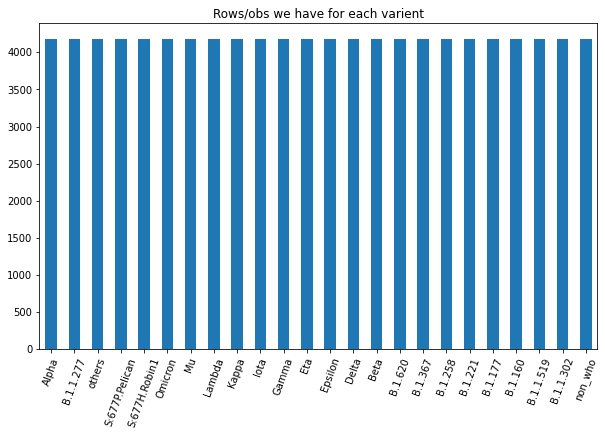

In [ ]:
### how many rows/obs we have for each varient
plt.figure(figsize=(10,6))
data['variant'].value_counts().plot.bar()
plt.title('Rows/obs we have for each varient')
plt.xticks(rotation=70)
plt.show()


In [ ]:
### how many countries we have in total?
print('Total Countries:', data['location'].nunique())
print('Countries: ', data['location'].unique())

Total Countries: 121
Countries:  ['Angola' 'Argentina' 'Aruba' 'Australia' 'Austria' 'Bahrain' 'Bangladesh'
 'Belgium' 'Belize' 'Benin' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Cambodia' 'Cameroon' 'Canada' 'Chile' 'Colombia'
 'Costa Rica' 'Croatia' 'Curacao' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'Estonia' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kosovo' 'Kuwait' 'Latvia' 'Lebanon' 'Liechtenstein' 'Lithuania'
 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives' 'Malta'
 'Mauritius' 'Mexico' 'Moldova' 'Monaco' 'Mongolia' 'Montenegro' 'Morocco'
 'Mozambique' 'Nepal' 'Netherlands' 'New Zealand' 'Nigeria'
 'North Macedonia' 'Norway' 'Oman' 'Pakistan' 'Papua New Guinea'
 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal' 

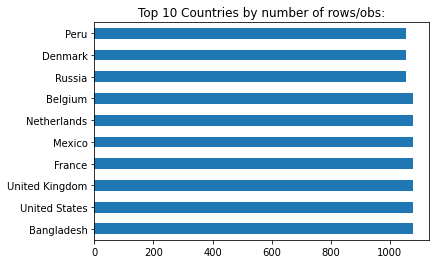

In [ ]:
### how many rows/obs we have for each location
data['location'].value_counts().sort_values(ascending=False).head(10).plot.barh()
plt.title('Top 10 Countries by number of rows/obs:')
plt.show()

In [ ]:
### total number of sequences per location
total_sequences_per_country = data.groupby('location')['num_sequences_total'].sum().sort_values(ascending=False)

In [ ]:
top_ten_by_seq = pd.DataFrame(total_sequences_per_country.head(10)).reset_index()

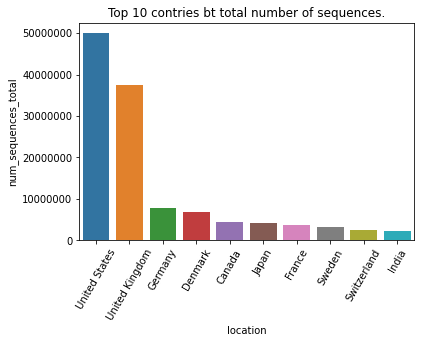

In [ ]:
sns.barplot(data = top_ten_by_seq, x='location', y='num_sequences_total')
plt.xticks(rotation=60)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Top 10 contries bt total number of sequences.')
plt.show()

In [ ]:
### grouby date
### date on which top num of sequences were there
data.groupby('date')['num_sequences_total'].max().sort_values().tail(1)

date
2021-08-09    146170
Name: num_sequences_total, dtype: int64

In [ ]:
data.groupby(['date', 'location'])['num_sequences_total'].max()

date        location      
2020-05-11  Argentina         151
            Australia         148
            Austria            34
            Bangladesh        124
            Belgium           134
                             ... 
2022-01-05  Pakistan            6
            Poland            124
            Sri Lanka          11
            United Kingdom    562
            United States      35
Name: num_sequences_total, Length: 4184, dtype: int64